# Scenario E - Peakshape Variation (pVoigt model - results evaluation)

This file is used to evaluate the inference results.

In this scenario the peakshape in a spectrum with a fixed number of peaks is varied from Gaussian (n = 0.0) to Lorentzian (n = 1.0). All datasets contain 3 peaks and the noise level is kept constant at 1%.

The model used in the inference of the parameters is formulated as follows:

\begin{equation}
\large y = f(x) = \sum\limits_{m=1}^M \big[A_m \cdot f_{pseudo-Voigt}(x)\big] + \epsilon
\end{equation}

where:

\begin{equation}
\large f_{pseudo-Voigt}(x) = \eta \cdot \frac{\sigma_m^2}{(x-\mu_m)^2 + \sigma_m^2} + (1 - \eta) \cdot e^{-\frac{(x-\mu_m)^2}{2\cdot\sigma_m^2}}
\end{equation}

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

#az.style.use('arviz-darkgrid')

print('Running on PyMC3 v{}'.format(pm.__version__))

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC3 v3.8


## Load results summary

In [5]:
# load results from disk
df = pd.read_csv('./output_peakshape_pvoigt_lrun/scenario_peakshape_pvoigt.csv')
df.index += 1
df

,r_hat,mcse,ess,bfmi,r2,waic,epsilon,epsilon_real,eta,eta_real
1,1.780909,0.226636,104.363636,1.249257,0.999856,-4675.470979,0.049972,0.05,0.005661,0.0
2,1.000000,0.000000,4383.363636,1.029887,0.999035,-2331.742859,0.109758,0.05,0.000332,0.0
3,1.070909,0.049455,684.363636,1.014762,0.999820,-4207.406117,0.059134,0.05,0.000384,0.0
4,1.005455,0.003818,1720.727273,1.037991,0.999818,-4715.487126,0.050034,0.05,0.008271,0.0
5,1.000000,0.000727,2124.454545,1.044191,0.999872,-4726.544298,0.049924,0.05,0.001852,0.0
...,...,...,...,...,...,...,...,...,...,...
196,1.000000,0.000182,2297.909091,1.000964,0.999846,-4766.885947,0.049235,0.05,0.998066,1.0
197,1.450909,0.557818,1605.181818,1.008004,0.999950,-4836.525261,0.048113,0.05,0.999041,1.0
198,1.000000,0.000000,4905.090909,1.054635,0.999424,-2786.356407,0.094399,0.05,0.977116,1.0
199,1.000000,0.000000,3922.636364,0.997197,0.999916,-4743.426499,0.049649,0.05,0.999503,1.0


In [6]:
#suc = df.loc[(df['r_hat'] <= 1.1) & (df['r2'] >= 0.99)]
#suc
suc = df.loc[(df['r2'] >= 0.99)]
len(suc)

198

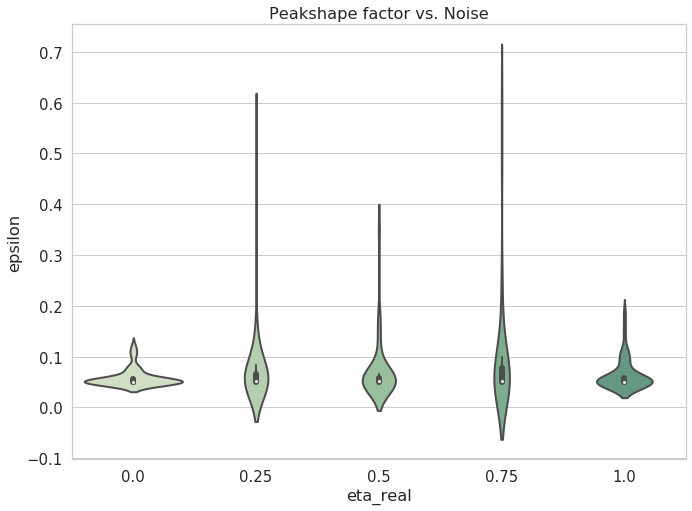

In [57]:
import seaborn as sns
sns.set(style="whitegrid", rc={'figure.figsize':(11,8)}, font_scale=1.35)
pal = sns.cubehelix_palette(8, rot=-.5, dark=.3)
#inner="stick"
ax = sns.violinplot(x='eta_real', y='epsilon', data=df, palette=pal, linewidth=2) \
                    .set_title("Peakshape factor vs. Noise")
#ax = sns.swarmplot(x="eta_real", y="epsilon", data=suc, color=".2")
plt.savefig('violinplot.png', dpi=150)

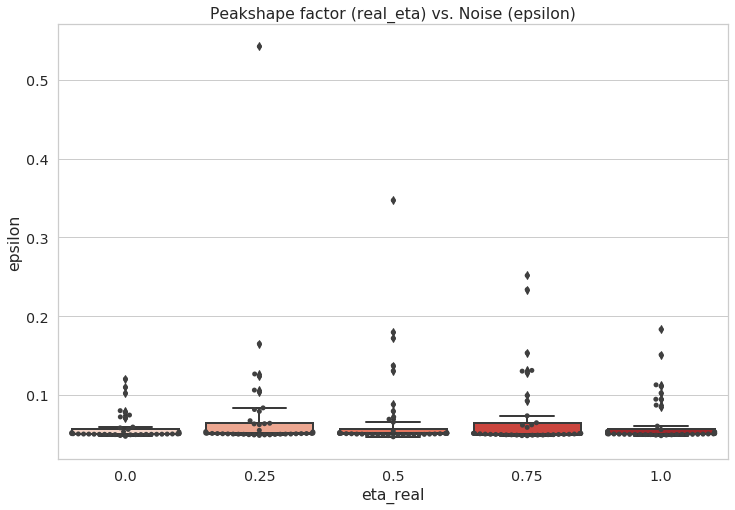

In [34]:
ax = sns.boxplot(x='eta_real', y='epsilon', data=suc, palette="Reds", linewidth=2) \
                    .set_title("Peakshape factor (real_eta) vs. Noise (epsilon)")
ax = sns.swarmplot(x="eta_real", y="epsilon", data=suc, color=".25")